In [3]:
import pandas as pd
import os
import numpy as np

In [7]:
gene_list = pd.read_csv("./data/ecoli/net3_gene_ids.tsv", sep="\t")

In [97]:
gene_list.iloc[[488,408],]

,#ID,Name
488,G489,recO
408,G409,yfaA


In [95]:
G=nx.read_edgelist("./data/ecoli/edgelist_biogrid.txt", nodetype=int, data=(('weight',float),), delimiter=' ')

In [152]:
len(sorted(nx.common_neighbors(G, 488,408)))

53

In [153]:
len(sorted(nx.neighbors(G, 488)))


153

In [154]:
len(sorted(nx.neighbors(G, 408)))

117

In [2]:
if os.path.isfile("./data/ecoli/updated_edgelist_biogrid.txt")==False:
    file_name = '/Users/kk3671/Downloads/BIOGRID-ALL-3.4.153.tab2.txt'
    biogrid_data = pd.read_csv(file_name, sep="\t")

    ecoli_data = biogrid_data[(biogrid_data['Organism Interactor A'] == 316407) & (biogrid_data['Organism Interactor B'] == 316407)]
    ecoli_data = ecoli_data[['Official Symbol Interactor A', 'Official Symbol Interactor B']]
    ecoli_data.to_csv("./data/ecoli/update_edgelist_biogrid.txt", index=False, header=False)


NameError: name 'os' is not defined

In [4]:
ecoli_data

,Official Symbol Interactor A,Official Symbol Interactor B
712117,minC,minC
715660,ffh,ftsY
715661,ffh,ftsY
785021,yfbW,sgrS
785022,yeiW,sgrS
785023,ecnA,sgrS
785024,slt,sgrS
785025,yjjA,sgrS
785026,yjiZ,sgrS
785027,yjiY,sgrS


In [5]:
gene_list = pd.read_csv("./data/ecoli/net3_gene_ids.tsv", sep="\t")
file_name = './data/ecoli/update_edgelist_biogrid.txt'
gold_standard_data = pd.read_csv(file_name, sep=",", header=None)


In [6]:
gold_standard_data

,0,1
0,minC,minC
1,ffh,ftsY
2,ffh,ftsY
3,yfbW,sgrS
4,yeiW,sgrS
5,ecnA,sgrS
6,slt,sgrS
7,yjjA,sgrS
8,yjiZ,sgrS
9,yjiY,sgrS


In [7]:
gold_standard_data.columns = ['gene','gene2']
gold_standard_data['relation'] = 1
gene_list.columns = ['id','gene']

In [8]:
gold_standard_data

,gene,gene2,relation
0,minC,minC,1
1,ffh,ftsY,1
2,ffh,ftsY,1
3,yfbW,sgrS,1
4,yeiW,sgrS,1
5,ecnA,sgrS,1
6,slt,sgrS,1
7,yjjA,sgrS,1
8,yjiZ,sgrS,1
9,yjiY,sgrS,1


In [9]:

merged = pd.merge(gene_list, gold_standard_data, on="gene")
merged.columns = ['id','gene2', 'gene', 'relation']
merged

,id,gene2,gene,relation
0,G3,dnaA,sbcD,1
1,G3,dnaA,ydcX,1
2,G3,dnaA,ygfA,1
3,G3,dnaA,yqiG,1
4,G3,dnaA,ybgI,1
5,G3,dnaA,tfaR,1
6,G3,dnaA,yejO,1
7,G3,dnaA,hfq,1
8,G3,dnaA,mdtI,1
9,G3,dnaA,rpmG,1


In [10]:
merged2 = pd.merge(gene_list, merged, on="gene")

final_goldStandard = merged2[['id_x','id_y','relation']]
final_goldStandard = final_goldStandard.sort_values(by=['relation'], ascending=False)
final_goldStandard.to_csv("./data/ecoli/update_biogrid_edgelist.txt", index=False, header=False)

In [1]:
df = pd.read_csv("./data/ecoli/latest_biogrid_edgelist.txt", sep=",", header=None)
df[0] = df[0].apply(lambda x: x.replace('g', '').replace('G', ''))
df[1] = df[1].apply(lambda x: x.replace('g', '').replace('G', ''))
df

NameError: name 'pd' is not defined

In [14]:
df = df.astype(float)  # imoprtant for later to check for equality
df[0] = df[0].apply(lambda x: x - 1)
df[1] = df[1].apply(lambda x: x - 1)
df = df.astype(int)  # imoprtant for later to check for equality
df

,0,1,2
0,0,509,1
1,3081,1274,1
2,3081,974,1
3,3081,981,1
4,3081,1004,1
5,3081,1013,1
6,3081,1098,1
7,3081,1172,1
8,3081,1236,1
9,3081,1324,1


In [15]:
print(df.shape)
df = df.drop_duplicates()
df.shape

(160502, 3)


(159524, 3)

In [16]:
df = pd.DataFrame(df[df[0]!=df[1]])

In [17]:
df.shape

(159523, 3)

In [18]:
df2 = pd.read_csv("./data/ecoli/edgelist_biogrid.txt", sep=" ", header=None)

In [19]:
x = list(set(map(tuple, df.values)) - set(map(tuple, df2.values)))

In [20]:
X_pos = pd.DataFrame(x)

In [21]:
X_pos.shape

(11183, 3)

In [22]:
neg_samples = pd.read_csv("./data/ecoli/neg_sample.txt", header=None, sep=",")

In [23]:
index = np.random.permutation(neg_samples.shape[0])[:X_pos.shape[0]]

In [24]:
np.max(index)

20194474

In [25]:
X_neg = neg_samples.iloc[index,:]

In [26]:
X_neg.shape

(11183, 3)

In [27]:
evaluation_data = np.concatenate([X_pos.values, X_neg.values])

In [28]:
evaluation_data.shape

(22366, 3)

In [29]:
pd.DataFrame(evaluation_data).to_csv("/Users/kk3671/Documents/ecoli_evaluation_data.txt", index=False, header=False, sep=' ')

In [28]:
df = df.astype(float)  # imoprtant for later to check for equality
df[0] = df[0].apply(lambda x: x - 1)
df[1] = df[1].apply(lambda x: x - 1)
df = df.astype(int)  # imoprtant for later to check for equality
df

,0,1,2
0,0,509,1
1,3081,1274,1
2,3081,974,1
3,3081,981,1
4,3081,1004,1
5,3081,1013,1
6,3081,1098,1
7,3081,1172,1
8,3081,1236,1
9,3081,1324,1


In [11]:
import scipy.io as sio
from scipy.sparse import coo_matrix
def _load_network(filename, num_genes, mtrx='adj'):
    print ("### Loading [%s]..." % (filename))
    if mtrx == 'adj':
        i, j, val = np.loadtxt(filename).T
        A = coo_matrix((val, (i, j)), shape=(num_genes, num_genes))
        A = A.todense()
        A = np.squeeze(np.asarray(A))
    else:
        print ("### Wrong mtrx type. Possible: {'adj', 'inc'}")
    A = A - np.diag(np.diag(A))
    return A

In [14]:
adj = _load_network("./data/ecoli/edgelist_biogrid.txt", len(gene_list))

### Loading [./data/ecoli/edgelist_biogrid.txt]...


In [15]:
np.sum(adj)

148340.0

In [3]:
from numba import jit
from sklearn.metrics.pairwise import cosine_similarity
import pickle
from evaluation import load_embedding
from sklearn import metrics

In [4]:
embeddings_file = open("./output/ecoli/embeddings_evaluation.pkl", 'rb')
embeddings = pickle.load(embeddings_file)
embeddings_file.close()

In [160]:
from sklearn import preprocessing
normalizer = preprocessing.Normalizer()
vectors =  normalizer.fit_transform(embeddings, 'l2')

In [161]:
vectors

array([[  9.57737288e-02,  -8.86795966e-02,   6.28800783e-02, ...,
         -1.31034567e-01,  -1.89388027e-02,  -8.07618686e-02],
       [ -1.62384137e-01,  -6.31479111e-02,  -6.63992792e-02, ...,
         -9.14973512e-02,   2.28733620e-02,   1.33368493e-01],
       [  2.51018215e-02,  -3.05235101e-02,  -4.06780640e-03, ...,
         -1.19542825e-01,  -8.43636824e-02,   2.80760349e-02],
       ..., 
       [ -4.09131991e-02,  -3.98026942e-02,  -2.76376992e-02, ...,
          7.33051574e-02,   1.77259824e-02,   1.34944086e-01],
       [  1.08331248e-01,  -2.61291388e-02,  -2.34157037e-02, ...,
         -1.61882278e-01,   8.68020779e-02,  -1.49470955e-01],
       [  9.87598398e-02,   6.35998545e-05,   1.23375155e-01, ...,
          8.92570541e-03,  -4.45163302e-03,   1.11025865e-01]])

In [5]:
cosine = cosine_similarity(embeddings, embeddings)
cosine = cosine - np.diag(np.diag(cosine))

In [6]:
from utils import *
cosine = np.tril(cosine)

In [7]:
cosine_edgelist = convertAdjMatrixToSortedRankTSV(cosine)

In [9]:
cosine_edgelist.columns = [0,1,2]
cosine_edgelist

,0,1,2
18544166,4110,3956,0.624885
6397836,1418,1238,0.603113
13899694,3081,1303,0.599733
20337574,4508,1986,0.599720
14779747,3276,1711,0.597413
13114816,2907,1339,0.595412
5454769,1209,970,0.591498
17519873,3883,3660,0.590375
10470527,2321,496,0.589653
19446231,4310,3821,0.586850


In [12]:
G = nx.read_edgelist("./data/ecoli/edgelist_biogrid.txt", nodetype=int, data=(('weight', float),))

In [52]:
G.has_edge(	2713,1136)

False

In [51]:
sorted(nx.common_neighbors(G, 2713, 1136))

[]

In [23]:
exp_data = pd.read_csv("./data/ecoli/net3_expression_data.tsv", sep="\t")

In [ ]:
4502	4509

In [50]:
np.corrcoef(exp_data.iloc[:,2713], exp_data.iloc[:,1136])

array([[ 1.        ,  0.13138401],
       [ 0.13138401,  1.        ]])

In [49]:
cosine_edgelist[cosine_edgelist.iloc[:,2]<0]

,0,1,2
12239479,2713,1136,-5.287598e-08
8179276,1813,833,-8.290286e-08
7312727,1621,396,-8.536161e-08
8548468,1895,123,-9.553405e-08
7700742,1707,465,-1.108072e-07
7389166,1638,148,-3.236166e-07
2161135,479,366,-5.550345e-07
15615733,3461,3162,-1.312138e-06
12086637,2679,1668,-1.447904e-06
16521640,3662,2358,-1.567238e-06


In [66]:
merged = pd.merge(cosine_edgelist, df, left_on=[0,1],right_on=[0,1], how="left")

In [67]:
merged = pd.merge(merged, df, left_on=[0,1],right_on=[1,0], how="left")

In [79]:
merged[merged.iloc[:,4]>0.5]

,key_0,1,0_x,1_x,2_x,2_y,0_y,1_y,2
0,488,200,488,200,0.999331,NaN,200.0,488.0,1.0
1,4403,864,4403,864,0.999187,NaN,NaN,NaN,NaN
2,3523,1487,3523,1487,0.999131,NaN,NaN,NaN,NaN
3,2670,1715,2670,1715,0.999101,1.0,NaN,NaN,NaN
4,2441,332,2441,332,0.999083,NaN,NaN,NaN,NaN
5,2321,1737,2321,1737,0.999014,NaN,NaN,NaN,NaN
6,1449,1278,1449,1278,0.998996,NaN,1278.0,1449.0,1.0
7,1753,1719,1753,1719,0.998987,1.0,NaN,NaN,NaN
8,1489,1197,1489,1197,0.998977,NaN,1197.0,1489.0,1.0
9,4322,4297,4322,4297,0.998938,NaN,NaN,NaN,NaN


In [77]:
np.sum(merged.iloc[:100000,5])

6461.0

In [4]:
from numba import jit
from sklearn.metrics.pairwise import cosine_similarity
import pickle
import numpy as np

In [23]:
embeddings_file = open("./output/ecoli/embeddings_0.2_0.2_0.pkl", 'rb')
ecoli_embeddings = pickle.load(embeddings_file)
embeddings_file.close()

In [27]:
ecoli_embeddings = pd.read_csv("output/embedding_visualization/ecoli/line_ecoli_embeddings.txt", header=None, sep="\t")

In [28]:
ecoli_embeddings.shape

(4511, 128)

In [29]:
cosine = cosine_similarity(ecoli_embeddings, ecoli_embeddings)
cosine = cosine - np.diag(np.diag(cosine))
cosine

array([[ 0.        ,  0.96146109,  0.31372345, ...,  0.26072526,
         0.94242144,  0.05186643],
       [ 0.96146109,  0.        ,  0.4117499 , ...,  0.16841614,
         0.96767908, -0.00856112],
       [ 0.31372345,  0.4117499 ,  0.        , ...,  0.20437622,
         0.3900359 ,  0.01342079],
       ..., 
       [ 0.26072526,  0.16841614,  0.20437622, ...,  0.        ,
         0.18175156, -0.01701646],
       [ 0.94242144,  0.96767908,  0.3900359 , ...,  0.18175156,
         0.        , -0.03415603],
       [ 0.05186643, -0.00856112,  0.01342079, ..., -0.01701646,
        -0.03415603,  0.        ]])

In [75]:
np.max(cosine)

0.76437804538905063

In [30]:
@jit
def find_old_gold_standard():
    y = []
    predicted = []
    for i in range(0, df.shape[0]):
        index = np.array(df.iloc[i,:2])
        y.append(max(adj[index[1], index[0]] , adj[index[0], index[1]]))
        predicted.append(cosine[index[1], index[0]])
    return y, predicted

In [31]:
df.shape

(159523, 6)

In [41]:
y_old, predicted = find_old_gold_standard()

In [42]:
np.sum(y_old)

148629.0

In [43]:
len(predicted)

159523

In [70]:
df['old_true'] = y_old

ValueError: Length of values does not match length of index

In [45]:
df['score'] = predicted

In [46]:
df = df.sort_values('score', ascending=0)
df['score_rank'] = df['score'].rank(ascending=False)
df

,0,1,2,old_true,score,score_rank
109331,200,488,1,1.0,0.999331,1.0
36873,2670,1715,1,1.0,0.999101,2.0
92934,1278,1449,1,1.0,0.998996,3.0
151009,1753,1719,1,1.0,0.998987,4.0
91704,1197,1489,1,1.0,0.998977,5.0
60,3081,2670,1,1.0,0.998909,6.0
97704,1049,3569,1,1.0,0.998874,7.0
74194,3902,546,1,1.0,0.998858,8.0
4026,3137,1449,1,1.0,0.998839,9.0
116990,488,974,1,1.0,0.998830,10.0


In [47]:
old_predictions = df.loc[df['old_true']==0]
old_predictions

,0,1,2,old_true,score,score_rank
26788,2375,4102,1,0.0,0.997828,130.0
144417,1526,4041,1,0.0,0.997704,148.0
135677,2162,2382,1,0.0,0.997542,193.0
74415,3890,1762,1,0.0,0.997466,207.0
85639,780,1826,1,0.0,0.997200,279.0
81740,904,1903,1,0.0,0.996994,332.0
157822,1605,4183,1,0.0,0.996749,400.0
92255,1209,1922,1,0.0,0.996722,409.0
96755,1041,961,1,0.0,0.996648,428.0
144400,1526,3271,1,0.0,0.996629,432.0


In [69]:
new_predictions = df.loc[df['old_true']==0]
new_predictions

KeyError: 'old_true'

In [58]:
np.sum(new_predictions['score']>0.5)

4728

In [49]:
exp_data = pd.read_csv("./data/ecoli/data_standard.txt", header=None, sep=" ")
exp_data.shape

(4511, 806)

In [99]:
from scipy.stats.stats import pearsonr   

In [100]:
df.shape

(148340, 3)

In [153]:
from numba import jit

def feature_analysis(df):
    dataframe = pd.DataFrame()
    dataframe['gene_A_id'] = ''
    dataframe['gene_A'] = ''
    dataframe['num_neigh_A'] = ''
    dataframe['gene_B_id'] = ''
    dataframe['gene_B'] = ''
    dataframe['num_neigh_B'] = ''
    dataframe['first_order'] = ''
    dataframe['second_order'] = ''
    dataframe['jaccard'] = ''
    dataframe['exp_corr'] = ''
    for row in range(0, df.shape[0]):
#         print(str(row) +"/"+str(df.shape[0]))
        i = df.iloc[row,0]
        j = df.iloc[row,1]
        dataframe.loc[row,'gene_A_id'] = gene_list.iloc[i,0]
        dataframe.loc[row,'gene_A'] = gene_list.iloc[i,1]
        dataframe.loc[row,'num_neigh_A'] = len(sorted(nx.neighbors(G, i)))
        dataframe.loc[row,'gene_B_id'] = gene_list.iloc[j,0]
        dataframe.loc[row,'gene_B'] = gene_list.iloc[j,1]
        dataframe.loc[row,'num_neigh_B'] = len(sorted(nx.neighbors(G, j)))
        dataframe.loc[row,'first_order'] = G.has_edge(i, j)*1
        dataframe.loc[row,'second_order'] = len(sorted(nx.common_neighbors(G, i, j)))
        dataframe.loc[row,'exp_corr'] = np.corrcoef(exp_data.iloc[i,:],exp_data.iloc[j,:])[0, 1]
        dataframe.loc[row,'jaccard'] = float([float(p) for u,v, p in nx.jaccard_coefficient(G, [(i, j)])][0])
    return dataframe

In [152]:
 dataframe.sort_values(['jaccard', 'exp_corr'], ascending=[0, 0])

,gene_A_id,gene_A,num_neigh_A,gene_B_id,gene_B,num_neigh_B,exp_corr,jaccard,comm_neigh,first_order,second_order
36062,G2735,yjjB,205,G2044,cspI,219,0.999854,0.612167,NaN,1.0,161.0
965,G3082,pheM,214,G2044,cspI,219,0.999851,0.580292,NaN,1.0,159.0
84554,G1241,yfeA,188,G2216,yabI,207,0.999616,0.56746,NaN,1.0,143.0
36046,G2735,yjjB,205,G2216,yabI,207,0.999865,0.548872,NaN,1.0,146.0
84456,G1241,yfeA,188,G2044,cspI,219,0.999623,0.547529,NaN,1.0,144.0
85737,G1207,ybgJ,170,G3456,tdk,194,0.999735,0.542373,NaN,1.0,128.0
84361,G1241,yfeA,188,G1720,ybbM,209,0.999703,0.53876,NaN,1.0,139.0
35945,G2735,yjjB,205,G3082,pheM,214,0.999917,0.523636,NaN,1.0,144.0
25562,G2472,spoT,460,G2649,mdtI,464,0.999852,0.522241,NaN,1.0,317.0
78908,G785,gyrA,240,G2044,cspI,219,0.999061,0.514851,NaN,1.0,156.0


In [151]:
dataframe

,gene_A_id,gene_A,num_neigh_A,gene_B_id,gene_B,num_neigh_B,exp_corr,jaccard,comm_neigh,first_order,second_order
0,G1,yneL,8,G510,dipZ,949,-0.0215767,0.00209424,2.0,1.0,2.0
1,G3079,trmH,145,G4497,isrA,52,0.999919,0.100559,18.0,1.0,18.0
2,G3079,trmH,145,G1677,dnaK,156,0.999833,0.140152,37.0,1.0,37.0
3,G3079,trmH,145,G1709,emrE,87,0.999848,0.120773,25.0,1.0,25.0
4,G3079,trmH,145,G1918,eaeH,117,0.999806,0.196347,43.0,1.0,43.0
5,G3079,trmH,145,G2044,cspI,219,0.999815,0.263889,76.0,1.0,76.0
6,G3079,trmH,145,G2078,recC,336,0.999924,0.176039,72.0,1.0,72.0
7,G3079,trmH,145,G2163,hsdM,84,0.999956,0.174359,34.0,1.0,34.0
8,G3079,trmH,145,G2183,ygcI,645,0.999843,0.112676,80.0,1.0,80.0
9,G3079,trmH,145,G2241,rpsA,150,0.999945,0.204082,50.0,1.0,50.0


In [30]:
file_name = '/Users/kk3671/Downloads/BIOGRID-ALL-3.4.158.tab2.txt'
biogrid_data = pd.read_csv(file_name, sep="\t")

/Users/kk3671/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (1,2,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [9]:
biogrid_data.columns

NameError: name 'biogrid_data' is not defined

In [31]:
ecoli_data = biogrid_data[(biogrid_data['Organism Interactor A'] == 316407) & (biogrid_data['Organism Interactor B'] == 316407)]

In [32]:
ecoli_data = ecoli_data[['Official Symbol Interactor A', 'Official Symbol Interactor B','Author','Pubmed ID','Experimental System']]

In [33]:
ecoli_data.columns = ['gene','gene2','author','pubmedID','Experimental System']

In [34]:
gene_list

,id,gene
0,0,yneL
1,1,nikR
2,2,dnaA
3,3,tdcA
4,4,yhjB
5,5,nemR
6,6,cspA
7,7,metR
8,8,dhaR
9,9,rcsA


In [35]:
gene_list.columns = ['id', 'gene']
gene_list.id = gene_list.id.apply(lambda x: int(x.replace('g', '').replace('G', '')))
gene_list.id = gene_list.id.apply(lambda x: x - 1)
gene_list

AttributeError: 'int' object has no attribute 'replace'

In [36]:
ecoli_data

,gene,gene2,author,pubmedID,Experimental System
712117,minC,minC,Zhang M (2009),19457228,Two-hybrid
715660,ffh,ftsY,Shen K (2010),20385832,Co-crystal Structure
715661,ffh,ftsY,Shen K (2010),20385832,FRET
785021,yfbW,sgrS,Babu M (2011),22125496,Negative Genetic
785022,yeiW,sgrS,Babu M (2011),22125496,Negative Genetic
785023,ecnA,sgrS,Babu M (2011),22125496,Negative Genetic
785024,slt,sgrS,Babu M (2011),22125496,Negative Genetic
785025,yjjA,sgrS,Babu M (2011),22125496,Negative Genetic
785026,yjiZ,sgrS,Babu M (2011),22125496,Negative Genetic
785027,yjiY,sgrS,Babu M (2011),22125496,Negative Genetic


In [76]:
merged_details = pd.merge(gene_list, ecoli_data, on="gene")
merged_details.columns = ['id','gene2', 'gene', 'author', 'pubmedID','Experimental System']
merged_details

,id,gene2,gene,author,pubmedID,Experimental System
0,2,dnaA,sbcD,Kumar A (2016),26774489,Negative Genetic
1,2,dnaA,ydcX,Kumar A (2016),26774489,Negative Genetic
2,2,dnaA,ygfA,Kumar A (2016),26774489,Negative Genetic
3,2,dnaA,yqiG,Kumar A (2016),26774489,Negative Genetic
4,2,dnaA,ybgI,Kumar A (2016),26774489,Negative Genetic
5,2,dnaA,tfaR,Kumar A (2016),26774489,Negative Genetic
6,2,dnaA,yejO,Kumar A (2016),26774489,Negative Genetic
7,2,dnaA,hfq,Kumar A (2016),26774489,Negative Genetic
8,2,dnaA,mdtI,Kumar A (2016),26774489,Negative Genetic
9,2,dnaA,rpmG,Kumar A (2016),26774489,Negative Genetic


In [77]:
details_table = pd.merge(gene_list, merged_details, on="gene")

In [78]:
details_table = details_table.drop_duplicates()
details_table

,id_x,gene,id_y,gene2,author,pubmedID,Experimental System
0,0,yneL,509,dipZ,Babu M (2014),24586182,Positive Genetic
1,0,yneL,766,ygfZ,Babu M (2014),24586182,Positive Genetic
2,0,yneL,776,ydiS,Babu M (2014),24586182,Negative Genetic
3,0,yneL,1972,paaI,Babu M (2014),24586182,Negative Genetic
4,0,yneL,2467,thrA,Babu M (2014),24586182,Negative Genetic
5,0,yneL,2475,tig,Babu M (2014),24586182,Negative Genetic
6,0,yneL,2536,ppiC,Babu M (2014),24586182,Negative Genetic
7,0,yneL,2817,oppA,Babu M (2014),24586182,Negative Genetic
8,1,nikR,305,pspC,Babu M (2014),24586182,Positive Genetic
9,1,nikR,462,alr,Babu M (2014),24586182,Negative Genetic


In [3]:
predictions = pd.read_csv("../Gene-Network-Embedding/data/ecoli/improved_predictions.txt", header=None, sep=",")

In [4]:
new_predictions = predictions.loc[predictions.iloc[:,2]==1]

In [5]:
new_predictions

,0,1,2,3,4,5,6,7
0,339,4264,1,0.041730,0.217251,17124.0,14519.0,0.175521
1,4216,1904,1,0.017473,0.386164,20491.0,9926.0,0.368691
2,561,3809,1,0.120793,0.151144,10539.0,16906.0,0.030351
3,226,4198,1,0.046831,0.160911,16474.0,16547.0,0.114079
4,3689,1729,1,0.071850,0.484265,13956.0,7820.0,0.412415
5,4142,2543,1,0.201691,0.646161,7329.0,4879.0,0.444470
6,3801,980,1,0.070242,0.348224,14095.0,10901.0,0.277981
7,2387,2578,1,0.002931,0.075695,22277.0,20056.0,0.072764
8,2974,3507,1,0.374405,0.979630,4396.0,104.0,0.605225
9,3217,3617,1,0.134646,0.794281,9822.0,2602.0,0.659636


In [6]:
prediction_reference = []
all_predictions = []
structure_predictions = []
for i in range(0, new_predictions.shape[0]):
    id_x = new_predictions.iloc[i,0]
    id_y = new_predictions.iloc[i,1]
    data = details_table.loc[(details_table['id_x']==id_x) & (details_table['id_y']==id_y)]
    all_predictions.append( new_predictions.iloc[i, 4])
    structure_predictions.append(new_predictions.iloc[i, 3])
    prediction_reference.append(list(data.values.flatten()))

NameError: name 'details_table' is not defined

In [93]:
prediction = []
cols = ['id_x','geneA', 'id_y', 'gene B', 'author', 'pubmedID','Experimental System']
prediction = pd.DataFrame(prediction_reference)
prediction['structure_score'] = structure_predictions
prediction['all_score'] = all_predictions

In [94]:
# prediction = prediction.iloc[:,[1,3,4,5,6]]
prediction

,0,1,2,3,4,5,6,structure_score,all_score
0,339,sufC,4264,ribA,Babu M (2017),29176613,Affinity Capture-MS,0.041730,0.217251
1,4216,ydbK,1904,phoR,Babu M (2017),29176613,Affinity Capture-MS,0.017473,0.386164
2,561,msbA,3809,sucD,Babu M (2017),29176613,Affinity Capture-MS,0.120793,0.151144
3,226,galR,4198,bglX,Babu M (2017),29176613,Affinity Capture-MS,0.046831,0.160911
4,3689,ppa,1729,nuoL,Babu M (2017),29176613,Affinity Capture-MS,0.071850,0.484265
5,4142,pyrC,2543,folD,Babu M (2017),29176613,Affinity Capture-MS,0.201691,0.646161
6,3801,yrbF,980,secF,Babu M (2017),29176613,Affinity Capture-MS,0.070242,0.348224
7,2387,relA,2578,pyrH,Babu M (2017),29176613,Affinity Capture-MS,0.002931,0.075695
8,2974,secG,3507,ycbL,Babu M (2017),29176613,Affinity Capture-MS,0.374405,0.979630
9,3217,cysQ,3617,thyA,Babu M (2017),29176613,Affinity Capture-MS,0.134646,0.794281


In [95]:
lists = "Positive Genetic", "Negative Genetic"

In [109]:
physical_interactions = prediction.loc[~(prediction.iloc[:,4].isin(lists))]

In [110]:
physical_interactions

,0,1,2,3,4,5,6,structure_score,all_score
0,339,sufC,4264,ribA,Babu M (2017),29176613,Affinity Capture-MS,0.041730,0.217251
1,4216,ydbK,1904,phoR,Babu M (2017),29176613,Affinity Capture-MS,0.017473,0.386164
2,561,msbA,3809,sucD,Babu M (2017),29176613,Affinity Capture-MS,0.120793,0.151144
3,226,galR,4198,bglX,Babu M (2017),29176613,Affinity Capture-MS,0.046831,0.160911
4,3689,ppa,1729,nuoL,Babu M (2017),29176613,Affinity Capture-MS,0.071850,0.484265
5,4142,pyrC,2543,folD,Babu M (2017),29176613,Affinity Capture-MS,0.201691,0.646161
6,3801,yrbF,980,secF,Babu M (2017),29176613,Affinity Capture-MS,0.070242,0.348224
7,2387,relA,2578,pyrH,Babu M (2017),29176613,Affinity Capture-MS,0.002931,0.075695
8,2974,secG,3507,ycbL,Babu M (2017),29176613,Affinity Capture-MS,0.374405,0.979630
9,3217,cysQ,3617,thyA,Babu M (2017),29176613,Affinity Capture-MS,0.134646,0.794281


In [98]:
physical_interactions.sort_values(['all_score'], ascending=0)

,0,1,2,3,4,5,6,structure_score,all_score
7063,1236,ftsY,2989,iscS,Babu M (2017),29176613,Affinity Capture-MS,0.919131,0.997639
6321,2718,sapC,3978,sapF,Babu M (2017),29176613,Affinity Capture-MS,0.991072,0.995230
1154,2425,lolB,1451,ychM,Babu M (2017),29176613,Affinity Capture-MS,0.977842,0.993561
1064,965,uvrD,2776,exbB,Babu M (2017),29176613,Affinity Capture-MS,0.960295,0.993363
4250,2776,exbB,3438,miaB,Babu M (2017),29176613,Affinity Capture-MS,0.744498,0.992974
5221,4102,yfdH,2849,galF,Babu M (2017),29176613,Affinity Capture-MS,0.988156,0.992399
173,4102,yfdH,3223,ynaI,Babu M (2017),29176613,Affinity Capture-MS,0.983161,0.992399
591,3495,hfq,2389,ispF,Babu M (2017),29176613,Affinity Capture-MS,0.746403,0.992383
4921,2776,exbB,852,glyA,Babu M (2017),29176613,Affinity Capture-MS,0.634323,0.992153
3719,3093,azoR,2698,folA,Babu M (2017),29176613,Affinity Capture-MS,0.515258,0.991037


In [112]:
physical_interactions['diff'] = physical_interactions['all_score'] - physical_interactions['structure_score']

In [113]:
np.mean(physical_interactions['diff'])

0.29458682952990095

In [103]:
physical_interactions.sort_values(['diff'], ascending=0)

,0,1,2,3,4,5,6,structure_score,all_score,diff
3623,3564,atpB,2451,rfbC,Babu M (2017),29176613,Affinity Capture-MS,0.013829,0.943812,0.929983
871,2969,narQ,2403,cydB,Babu M (2017),29176613,Affinity Capture-MS,0.012118,0.940659,0.928541
7137,2889,pcnB,3537,panD,Babu M (2017),29176613,Affinity Capture-MS,0.012518,0.936658,0.924140
6572,3674,fliF,2676,cheY,Babu M (2017),29176613,Affinity Capture-MS,0.015442,0.938982,0.923540
7215,1451,ychM,2840,proB,Babu M (2017),29176613,Affinity Capture-MS,0.016629,0.937625,0.920996
2061,2776,exbB,2840,proB,Babu M (2017),29176613,Affinity Capture-MS,0.023090,0.935922,0.912832
4800,3471,fliH,2676,cheY,Babu M (2017),29176613,Affinity Capture-MS,0.048263,0.953932,0.905669
2205,628,pgsA,2708,gadC,Babu M (2017),29176613,Affinity Capture-MS,0.026853,0.932166,0.905313
4153,3253,tam,2543,folD,Babu M (2017),29176613,Affinity Capture-MS,0.020067,0.925257,0.905190
5821,404,yfgM,3011,ccmE,Babu M (2017),29176613,Affinity Capture-MS,0.053314,0.958500,0.905186


In [44]:
# prediction.to_csv("./output/ecoli/prediction_details.txt", header=False, index=False, sep="\t")

In [115]:
physical_interactions = physical_interactions.loc[(physical_interactions['all_score']>0.75), :]

In [116]:
physical_interactions

,0,1,2,3,4,5,6,structure_score,all_score,diff
8,2974,secG,3507,ycbL,Babu M (2017),29176613,Affinity Capture-MS,0.374405,0.979630,0.605225
9,3217,cysQ,3617,thyA,Babu M (2017),29176613,Affinity Capture-MS,0.134646,0.794281,0.659636
11,4381,sodB,2151,ybhG,Babu M (2017),29176613,Affinity Capture-MS,0.931699,0.956976,0.025277
21,3271,lpxK,3136,clpX,Babu M (2017),29176613,Affinity Capture-MS,0.477718,0.892543,0.414824
23,4372,yhbT,1283,iscA,Babu M (2017),29176613,Affinity Capture-MS,0.319060,0.793517,0.474457
33,2852,yqhA,3223,ynaI,Babu M (2017),29176613,Affinity Capture-MS,0.204015,0.942460,0.738445
37,1729,nuoL,3011,ccmE,Babu M (2017),29176613,Affinity Capture-MS,0.407963,0.780335,0.372372
39,1096,mgtA,4425,ampH,Babu M (2017),29176613,Affinity Capture-MS,0.143982,0.808084,0.664103
44,2445,ptsH,3079,pykF,Babu M (2017),29176613,Affinity Capture-MS,0.317708,0.821151,0.503443
46,2412,ypdA,2576,hinT,Babu M (2017),29176613,Affinity Capture-MS,0.481036,0.884073,0.403037


In [108]:
physical_interactions.sort_values(['diff'], ascending=0)

,0,1,2,3,4,5,6,structure_score,all_score,diff
3623,3564,atpB,2451,rfbC,Babu M (2017),29176613,Affinity Capture-MS,0.013829,0.943812,0.929983
871,2969,narQ,2403,cydB,Babu M (2017),29176613,Affinity Capture-MS,0.012118,0.940659,0.928541
7137,2889,pcnB,3537,panD,Babu M (2017),29176613,Affinity Capture-MS,0.012518,0.936658,0.924140
6572,3674,fliF,2676,cheY,Babu M (2017),29176613,Affinity Capture-MS,0.015442,0.938982,0.923540
7215,1451,ychM,2840,proB,Babu M (2017),29176613,Affinity Capture-MS,0.016629,0.937625,0.920996
2061,2776,exbB,2840,proB,Babu M (2017),29176613,Affinity Capture-MS,0.023090,0.935922,0.912832
4800,3471,fliH,2676,cheY,Babu M (2017),29176613,Affinity Capture-MS,0.048263,0.953932,0.905669
2205,628,pgsA,2708,gadC,Babu M (2017),29176613,Affinity Capture-MS,0.026853,0.932166,0.905313
4153,3253,tam,2543,folD,Babu M (2017),29176613,Affinity Capture-MS,0.020067,0.925257,0.905190
5821,404,yfgM,3011,ccmE,Babu M (2017),29176613,Affinity Capture-MS,0.053314,0.958500,0.905186


In [7]:
import networkx as nx
import numpy as np
from operator import itemgetter
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [4]:
G_ecoli=nx.read_edgelist("./data/ecoli/edgelist_biogrid.txt", nodetype=int, data=(('weight',float),), delimiter=' ')

In [8]:
y_sorted_ecoli = sorted(G_ecoli.degree(),key=itemgetter(1),reverse=True)

In [33]:
data1 = [i
    [1]  for i in y_sorted_ecoli]

In [101]:
cosine = cosine_bk.copy()
cosine[cosine<0.30] = 0 

In [102]:
from scipy import sparse
cosine_sparse = sparse.csr_matrix(cosine)

In [103]:
predicted_graph = nx.from_scipy_sparse_matrix(cosine_sparse)

In [98]:
y_sorted_ecoli_predicted = sorted(predicted_graph.degree(),key=itemgetter(1),reverse=True)

In [99]:
y_sorted_ecoli_predicted

[(3269, 63),
 (3293, 60),
 (1986, 55),
 (2776, 42),
 (3167, 39),
 (4115, 35),
 (4057, 32),
 (4371, 31),
 (2197, 29),
 (3283, 29),
 (4358, 29),
 (4109, 27),
 (2635, 26),
 (2948, 26),
 (2808, 24),
 (3655, 24),
 (3956, 24),
 (3690, 22),
 (2648, 21),
 (3271, 21),
 (3279, 21),
 (4113, 21),
 (4182, 21),
 (4407, 21),
 (2944, 20),
 (3031, 20),
 (3081, 20),
 (3510, 20),
 (3494, 19),
 (3587, 19),
 (3646, 19),
 (3930, 19),
 (2759, 18),
 (3339, 18),
 (3419, 18),
 (3767, 18),
 (4188, 18),
 (1064, 17),
 (2475, 17),
 (3634, 17),
 (3753, 17),
 (3861, 17),
 (4290, 17),
 (1236, 16),
 (1953, 16),
 (2512, 16),
 (2905, 16),
 (3425, 16),
 (3686, 16),
 (3945, 16),
 (758, 15),
 (1378, 15),
 (1972, 15),
 (2762, 15),
 (2730, 14),
 (3720, 14),
 (4127, 14),
 (4405, 14),
 (2587, 13),
 (2683, 13),
 (3009, 13),
 (3286, 13),
 (3660, 13),
 (4326, 13),
 (760, 12),
 (1711, 12),
 (2111, 12),
 (3795, 12),
 (931, 11),
 (1611, 11),
 (1612, 11),
 (2104, 11),
 (2343, 11),
 (2437, 11),
 (2566, 11),
 (2631, 11),
 (3063, 11),
 (

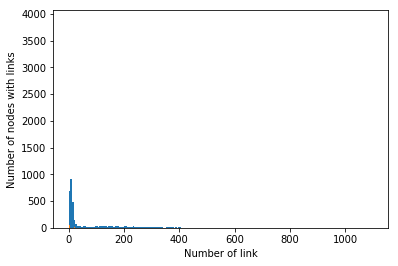

In [100]:
import matplotlib
import matplotlib.pyplot as plt
data1 = [i
    [1]  for i in y_sorted_ecoli]
data2 = [i
    [1]  for i in y_sorted_ecoli_predicted]

fig, ax = plt.subplots()
fig.set_tight_layout(False)
bar = plt.hist(data1, 200)
bar = plt.hist(data2, 200)

ax.set_ylabel(r"Number of nodes with links")
ax.set_xlabel("Number of link")
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.show()

In [15]:
import pandas as pd

In [16]:
ecoli_embeddings

array([[ 1.32182956, -0.73928285,  1.80744338, ..., -1.61198926,
        -0.89051092, -1.10916185],
       [-2.20521069, -1.05472898, -0.97868806, ..., -0.82414526,
         1.12533009,  2.85161543],
       [ 0.64066869,  0.1137256 , -1.3916558 , ...,  0.25490016,
        -0.36401665,  1.1894021 ],
       ..., 
       [-1.63513255,  0.07418022, -1.63227093, ...,  2.22097325,
         1.7450099 ,  1.77739167],
       [-0.13200191, -0.71400958, -1.16107309, ..., -1.18182468,
         0.86566871, -1.16000879],
       [ 0.71782851,  0.00612634,  1.52047729, ...,  0.43641156,
         0.22692007,  1.29524934]])

In [14]:
pd.DataFrame(ecoli_embeddings).to_csv("./data/ecoli/embeddings_tab.txt", sep="\t", header=False, index=False)

In [78]:
from networkx.readwrite import json_graph

In [81]:
data = json_graph.node_link_data(G)

In [82]:
import json

In [83]:
s = json.dumps(data)

In [85]:
with open('json_net.json', 'w') as outfile:
    json.dump(data, outfile)

In [37]:
predictions = pd.read_csv("../Gene-Network-Embedding/data/ecoli/predictions.txt", header=None, sep=",")

In [38]:
new_predictions = predictions.loc[predictions.iloc[:,2]==0]

In [39]:
new_predictions = new_predictions.iloc[:,[0,1,3]]

In [40]:
new_predictions.columns = ['id','id2','prob']

In [41]:
merged_prediction_details = pd.merge(gene_list, new_predictions, on="id")
merged_prediction_details

,id,gene,id2,prob
0,1,nikR,3283,0.043230
1,2,dnaA,1029,0.080729
2,2,dnaA,3674,0.077179
3,2,dnaA,211,0.006820
4,3,tdcA,2073,0.038349
5,4,yhjB,3604,0.015262
6,5,nemR,3166,0.017400
7,5,nemR,2449,0.010713
8,5,nemR,3883,0.005199
9,6,cspA,4333,0.121342


In [42]:
merged_prediction_details.columns = ['id2','gene', 'id', 'prob']

In [43]:
final_table = pd.merge(merged_prediction_details, gene_list, on="id")
final_table

,id2,gene_x,id,prob,gene_y
0,1,nikR,3283,0.043230,csrA
1,538,lsrF,3283,0.084439,csrA
2,924,ydhV,3283,0.051500,csrA
3,3874,gsiB,3283,0.008540,csrA
4,2,dnaA,1029,0.080729,rpoB
5,2435,cydD,1029,0.007619,rpoB
6,4310,gmhB,1029,0.113733,rpoB
7,4477,rydC,1029,0.003900,rpoB
8,2,dnaA,3674,0.077179,fliF
9,285,ynfL,3674,0.025672,fliF


In [44]:
final_table = final_table.iloc[:,[1,4,3]]
final_table

,gene_x,gene_y,prob
0,nikR,csrA,0.043230
1,lsrF,csrA,0.084439
2,ydhV,csrA,0.051500
3,gsiB,csrA,0.008540
4,dnaA,rpoB,0.080729
5,cydD,rpoB,0.007619
6,gmhB,rpoB,0.113733
7,rydC,rpoB,0.003900
8,dnaA,fliF,0.077179
9,ynfL,fliF,0.025672


In [45]:
final = final_table.sort_values(by=['prob'], ascending=False)

In [46]:
final_filtered = final.loc[final.prob >=0.5,:]

In [47]:
final_filtered

,gene_x,gene_y,prob
8368,gspD,fimD,0.999829
7772,yhcB,fecE,0.999460
9381,ubiF,mltB,0.999434
7663,rpmA,ackA,0.999353
7469,ubiE,secG,0.999194
10455,yegD,gdhA,0.999193
9359,ycfL,sapF,0.999025
491,lspA,sapA,0.998951
8768,yebG,ygcI,0.998949
9302,btuB,yhjE,0.998912


In [48]:
final_filtered.to_csv("/Users/kk3671/Desktop/ecoli_prediction_false_positives.txt", sep="\t", index=False, header=True)